In [1]:
import math
import numpy as np
import sounddevice as sd

#arduino
import serial
import time

#midi
import pygame
import mido

pygame 2.0.1 (SDL 2.0.14, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


## initialization

### arduino

In [2]:
# connect to arduino
# check serial port in firmata and change below. make sure baudrates match

arduino = serial.Serial(port='/dev/ttyACM0', baudrate=115200, timeout=0.1) #if permissions error, give 777 to arduino using sudo chmod 777 /dev/ttyACM0



In [3]:
#func to write to arduino, call whenever one wants to change arduino properties

def send_to_arduino(laser,value):
    arduino.write(bytes(laser, 'utf-8'))
    arduino.write(bytes(value, 'utf-8'))

### midi controller

In [4]:
#setup midi

mido.set_backend('mido.backends.rtmidi') # set backend to rtmidi
mido.get_output_names() # list midi devices


['Midi Through:Midi Through Port-0 14:0',
 'Akai LPD8 Wireless:Akai LPD8 Wireless MIDI 1 24:0',
 'Midi Through:Midi Through Port-0 14:0',
 'Akai LPD8 Wireless:Akai LPD8 Wireless MIDI 1 24:0']

In [11]:
def get_message(message):
    
    # CHECK BEFORE SHOW!!!!!!!!
    
    default_pwm_a = '100'
    default_pwm_b = '128'


    if message.type == 'control_change': #knobs
        knob = message.control
        value_int = message.value
        value = str(value_int)
        laser = ''

        if knob == 1: #what knob 1 should do
            laser = 'A'
        elif knob == 4:
            laser = 'B'
#             print(message.value)
#         elif knob == 5:
#             print(message.value)
#         elif knob == 4:
#             print(message.value)
#         elif knob == 5:
#             print(message.value)
#         elif knob == 6:
#             print(message.value)
#         elif knob == 7:
#             print(message.value)
#         elif knob == 8:
#             print(message.value)
        send_to_arduino(laser, value)


    elif message.type == 'note_on': #buttons
        button = message.note
        laser = ''
        on_off = ''
        
        if button == 36:
            laser = 'A'
            on_off = '0'
            
        elif button == 37:
            laser = 'A'
            on_off = default_pwm_a
            
        elif button == 40:
            laser = 'B'
            on_off = '0'
        
        elif button == 41:
            laser = 'B'
            on_off = default_pwm_b
        
        send_to_arduino(laser, on_off)


In [6]:
#open port to midi device listed above

port = mido.open_input('Akai LPD8 Wireless:Akai LPD8 Wireless MIDI 1 24:0', callback=get_message)

In [7]:
port.callback = lambda message: None

In [12]:
port.callback = get_message

## initialization

In [4]:
def square(freq, t, phase, shift):
    a = (np.sin(freq * t + phase)) + shift
    d = np.round(a)
    return d

In [8]:
sample_rate = 44100
duration = 1000 # in seconds

frequency_x = 0.5
frequency_y = 0.5

phase_x = np.pi/2
phase_y = 0

amplitude_x = 1
amplitude_y = 1

t = np.linspace(0, duration * 2 * np.pi , int(duration * sample_rate))

squarewave = square(2 *  frequency_x, t, 0, 0.5)

left = np.abs(np.sin(frequency_x * t + phase_x ) * amplitude_x) * squarewave
right = np.sin(frequency_y * t + phase_y) * amplitude_y


sinewave_data = np.array([right,left]).T


In [62]:
sd.play(sinewave_data, sample_rate)

In [63]:
sd.stop()



In [9]:
import matplotlib.pyplot as plt

# slicing 500 samples off of your wavfile should show about 5 cycles
plot_data = sinewave_data[:100]

fig, ax = plt.subplots()
ax.plot(plot_data, linewidth=3)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

plt.title('Sine Wave')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

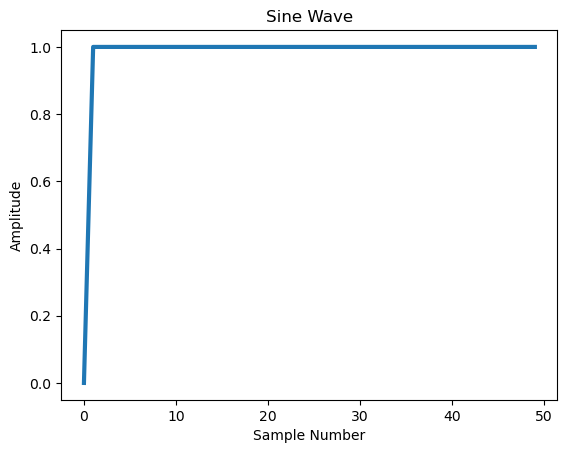

In [60]:
import matplotlib.pyplot as plt

# slicing 500 samples off of your wavfile should show about 5 cycles
plot_data = squarewave[:50]

fig, ax = plt.subplots()
ax.plot(plot_data, linewidth=3)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.show()